## Preliminary fixes

In [1]:
#import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import the dataset
data = pd.read_csv('cn_stocks.csv')

In [4]:
data.head()

,Index,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,Close.7,Close.8,Close.9,Close.10,Close.11,Close.12,Close.13,Close.14,Close.15,Close.16,Close.17
0,2004-01-02,10.50,9.58,7.25,13.67,7.68,5.81,7.80,11.55,5.21,13.80,23.70,25.19,10.88,4.12,5.08,7.98,9.25,16.81
1,2004-01-05,11.03,10.11,7.67,15.04,7.88,6.03,7.84,12.25,5.69,14.00,23.47,26.40,11.38,4.53,5.43,8.27,9.64,17.25
2,2004-01-06,11.36,10.45,7.72,15.17,8.23,5.91,8.15,12.67,5.60,13.86,22.98,26.96,11.79,4.88,5.65,8.38,9.92,17.97
3,2004-01-07,11.56,11.06,7.81,15.00,8.14,6.13,8.09,12.87,5.60,14.03,23.81,26.95,11.93,4.78,5.64,8.65,9.74,18.30
4,2004-01-08,11.63,10.67,7.72,15.27,8.18,6.15,8.30,12.90,5.58,14.65,23.68,27.42,12.05,4.94,5.78,8.67,10.44,17.83


In [5]:
#impute missing values with KNN
import fancyimpute as fi
stocks = fi.KNN(k=8).complete(data.iloc[:,1:20])
stocks = pd.DataFrame(stocks)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Imputing row 1/3349 with 0 missing, elapsed time: 2.190
Imputing row 101/3349 with 0 missing, elapsed time: 2.192
Imputing row 201/3349 with 0 missing, elapsed time: 2.193
Imputing row 301/3349 with 0 missing, elapsed time: 2.194
Imputing row 401/3349 with 0 missing, elapsed time: 2.196
Imputing row 501/3349 with 1 missing, elapsed time: 2.198
Imputing row 601/3349 with 1 missing, elapsed time: 2.206
Imputing row 701/3349 with 1 missing, elapsed time: 2.208
Imputing row 801/3349 with 1 missing, elapsed time: 2.210
Imputing row 901/3349 with 0 missing, elapsed time: 2.211
Imputing row 1001/3349 with 1 missing, elapsed time: 2.213
Imputing row 1101/3349 with 1 missing, elapsed time: 2.214
Imputing row 1201/3349 with 0 missing, elapsed time: 2.215
Imputing row 1301/3349 with 0 missing, elapsed time: 2.216
Imputing row 1401/3349 with 0 missing, elapsed time: 2.217
Imputing row 1501/3349 with 1 missing, elapsed time: 2.219
Imputing row 1601/3349 with 1 missing, elapsed time: 2.221
Imputing 

In [6]:
#add back the date column 
stocks = pd.concat([data['Index'], stocks], axis=1)

#Rename columns
stocks.columns = ['Date', 'Drabona', 'Eladda', 'Nasin', 'Gilvar', 
                'Din', 'Sonja', 'Sarion', 'Zelda', 'Azurehoof',
                'Nietrem', 'Gath', 'Pypina', 'Volodymyr',
                'Ysydda', 'Ronak', 'Ulvila', 'Voorogg', 'Finalien']

In [7]:
#convert Date column to datetime
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%Y-%m-%d')
stocks.set_index('Date', inplace=True) #set date column as index

In [9]:
#fix the dataset for weird values right at the end
stocks = stocks.loc[stocks.index < pd.to_datetime('2017-10-08')]

In [25]:
stocks.head()

,Drabona,Eladda,Nasin,Gilvar,Din,Sonja,Sarion,Zelda,Azurehoof,Nietrem,Gath,Pypina,Volodymyr,Ysydda,Ronak,Ulvila,Voorogg,Finalien
Date,,,,,,,,,,,,,,,,,,
2004-01-02,10.50,9.58,7.25,13.67,7.68,5.81,7.80,11.55,5.21,13.80,23.70,25.19,10.88,4.12,5.08,7.98,9.25,16.81
2004-01-05,11.03,10.11,7.67,15.04,7.88,6.03,7.84,12.25,5.69,14.00,23.47,26.40,11.38,4.53,5.43,8.27,9.64,17.25
2004-01-06,11.36,10.45,7.72,15.17,8.23,5.91,8.15,12.67,5.60,13.86,22.98,26.96,11.79,4.88,5.65,8.38,9.92,17.97
2004-01-07,11.56,11.06,7.81,15.00,8.14,6.13,8.09,12.87,5.60,14.03,23.81,26.95,11.93,4.78,5.64,8.65,9.74,18.30
2004-01-08,11.63,10.67,7.72,15.27,8.18,6.15,8.30,12.90,5.58,14.65,23.68,27.42,12.05,4.94,5.78,8.67,10.44,17.83


In [10]:
#define a function to compute daily returns
def compute_daily_returns(df):
    daily_returns = df.pct_change()
    daily_returns.iloc[0, :] = 0
    return daily_returns

#compute returns and put them in a dataframe
returns = compute_daily_returns(stocks)

In [26]:
returns.head()

,Drabona,Eladda,Nasin,Gilvar,Din,Sonja,Sarion,Zelda,Azurehoof,Nietrem,Gath,Pypina,Volodymyr,Ysydda,Ronak,Ulvila,Voorogg,Finalien
Date,,,,,,,,,,,,,,,,,,
2004-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2004-01-05,0.050476,0.055324,0.057931,0.100219,0.026042,0.037866,0.005128,0.060606,0.092131,0.014493,-0.009705,0.048035,0.045956,0.099515,0.068898,0.036341,0.042162,0.026175
2004-01-06,0.029918,0.033630,0.006519,0.008644,0.044416,-0.019900,0.039541,0.034286,-0.015817,-0.010000,-0.020878,0.021212,0.036028,0.077263,0.040516,0.013301,0.029046,0.041739
2004-01-07,0.017606,0.058373,0.011658,-0.011206,-0.010936,0.037225,-0.007362,0.015785,0.000000,0.012266,0.036118,-0.000371,0.011874,-0.020492,-0.001770,0.032220,-0.018145,0.018364
2004-01-08,0.006055,-0.035262,-0.011524,0.018000,0.004914,0.003263,0.025958,0.002331,-0.003571,0.044191,-0.005460,0.017440,0.010059,0.033473,0.024823,0.002312,0.071869,-0.025683


## Alternative modelling

In [12]:
#import Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import mixture as mix

In [14]:
#pick just the Volodymyr stock to test the model

#compute daily returns
stock = pd.DataFrame(stocks['Volodymyr'])
stock['Return'] = stock.pct_change()
stock.fillna(0, inplace=True)

In [15]:
#initiate the model
model = mix.GaussianMixture(n_components=2, 
                            covariance_type='spherical',
                            n_init=100,
                            random_state=0)

In [17]:
#fit the model to the data
scaler = StandardScaler()
model.fit(np.reshape(scaler.fit_transform(stock), (-1, stock.shape[1])))

#wait, predict? Predict to get the regime values for the entire dataset
regime = model.predict(np.reshape(scaler.fit_transform(stock), (-1, stock.shape[1])))

In [18]:
#create the regimes dataframe and add othe required columns
Regimes = pd.DataFrame(regime, columns=['Regime'], index=stock.index)\
            .join(stock, how='inner')\
                        .reset_index(drop=False)\
                        .rename(columns={'index':'Date'})

In [19]:
#Cumulative return, the correct way!
Regimes['market_cu_return'] = (Regimes['Return'] + 1).cumprod() - 1

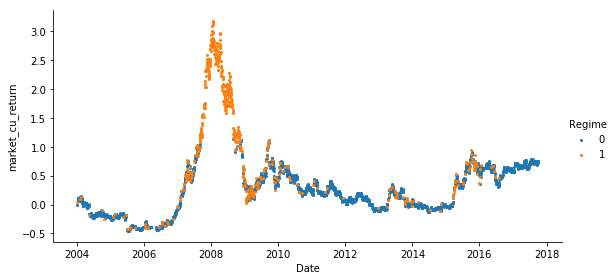

In [20]:
#visualize the GMM model's results                     
order = [0, 1]
fig = sns.FacetGrid(data=Regimes, hue='Regime', hue_order=order,
                    aspect=2, height=4)
fig.map(plt.scatter, 'Date', 'market_cu_return', s=4).add_legend()

In [21]:
#print mean and covariance of each regime
for i in order:
    print('Mean for regime %i: '%i, model.means_[i][0])
    print('Covariance for regime %i: '%i, (model.covariances_[i]))

Mean for regime 0:  -0.27716465765916265
Covariance for regime 0:  0.34153982828595797
Mean for regime 1:  1.1276347050652726
Covariance for regime 1:  2.867635057395112


Below, I create the Signal's column where a regime of 0 (because negative mean return) generates a sell signal while a regime of 1 (positive mean return) generates a buy signal. This is analagous to trading signals in most trend-following stock trading strategies (e.g. MAC, RSI, etc.).

In [30]:
#create regimes and assign them to trading signals    
Regimes['Signal'] = 0
Regimes.loc[Regimes['Regime'] == 0, 'Signal'] = -1 #sell
Regimes.loc[Regimes['Regime'] == 1, 'Signal'] = 1 #buy

Calculate returns from employing the trading strategy and calculate cumulative returns(?):

In [33]:
#calculate daily strategy returns by multiplying the strategy signal with the daily market return
Regimes['str_ret'] = Regimes['Signal'] * Regimes['Return'].shift(-1)
Regimes.fillna(0, inplace=True)

#calculate cumulative strategy return. But cumsum() and not cumprod()?
Regimes['strategy_cu_return'] = (Regimes['str_ret'].cumsum())

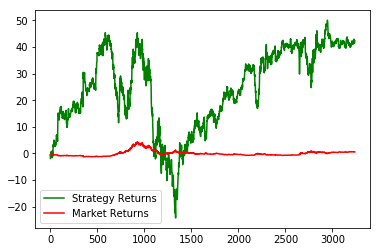

In [34]:
#plot the results
plt.plot(Regimes['strategy_cu_return'], color='g', label='Strategy Returns')
plt.plot(Regimes['market_cu_return'], color='r', label='Market Returns')
plt.legend(loc='best')